# Bayesian fixed effects meta analysis for WQC and BMI

From a list of Pearson correlation coefficients and corresponding sample sizes, we are going to infer the population level true correlation coefficient.

**Acknowledgement:** Development of the Bayesian meta analysis code greatly benefited from advice from Joachim Vandekerckhove.

In [1]:
import metaBayes.correlation as bm_corr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm  # optionally used for diagnosing the MCMC trace
%config InlineBackend.figure_format = 'retina'

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [2]:
pm.__version__

'3.7'

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
data_weight = pd.read_csv('data/meta_analysis/meta_analysis_correlations_weightloss.csv')
data_weight

,study,R,N,pub_year,discount_measure,Notes
0,Our study,0.067,257,2019,lnk,NaN
1,Lim & Bruce (2015),0.130,42,2015,lnk,NaN


In [5]:
results, prior, posterior, model = bm_corr.fit(data_weight, type='fixed effects')

Prior over population effect size: Stretched Beta
Sampling from prior


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Sampling from posterior


Multiprocess sampling (4 chains in 2 jobs)
NUTS: [r_pop]
Sampling 4 chains, 0 divergences: 100%|██████████| 40000/40000 [00:15<00:00, 2649.35draws/s]


Estimated true correlation coefficient:
	0.074 [95% HDI: -0.034, 0.187]


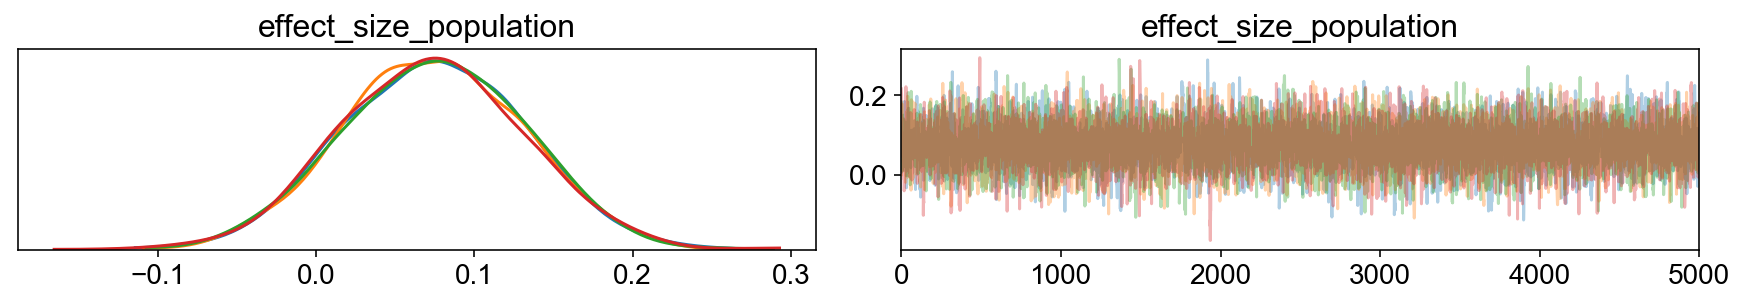

In [6]:
pm.traceplot(posterior, var_names='effect_size_population');

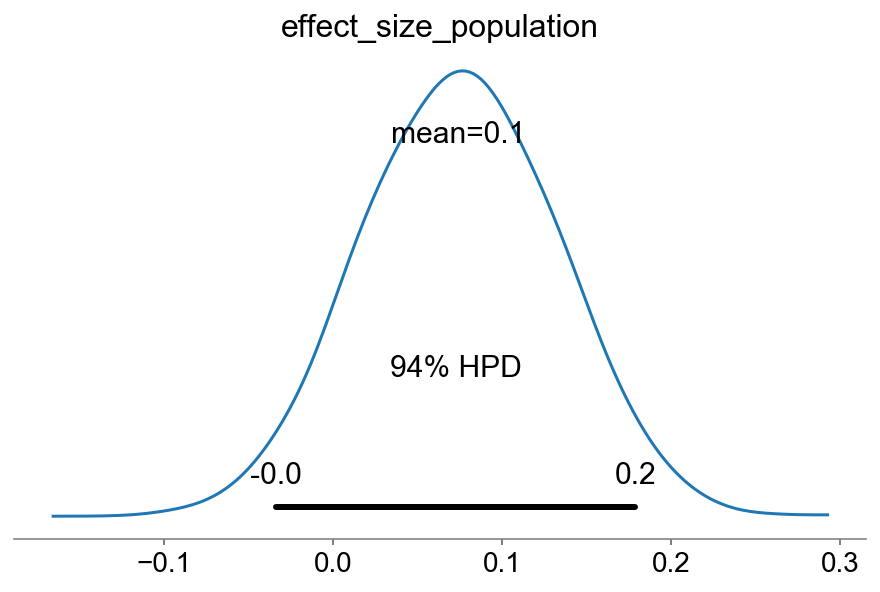

In [6]:
pm.plot_posterior(posterior, var_names='effect_size_population');

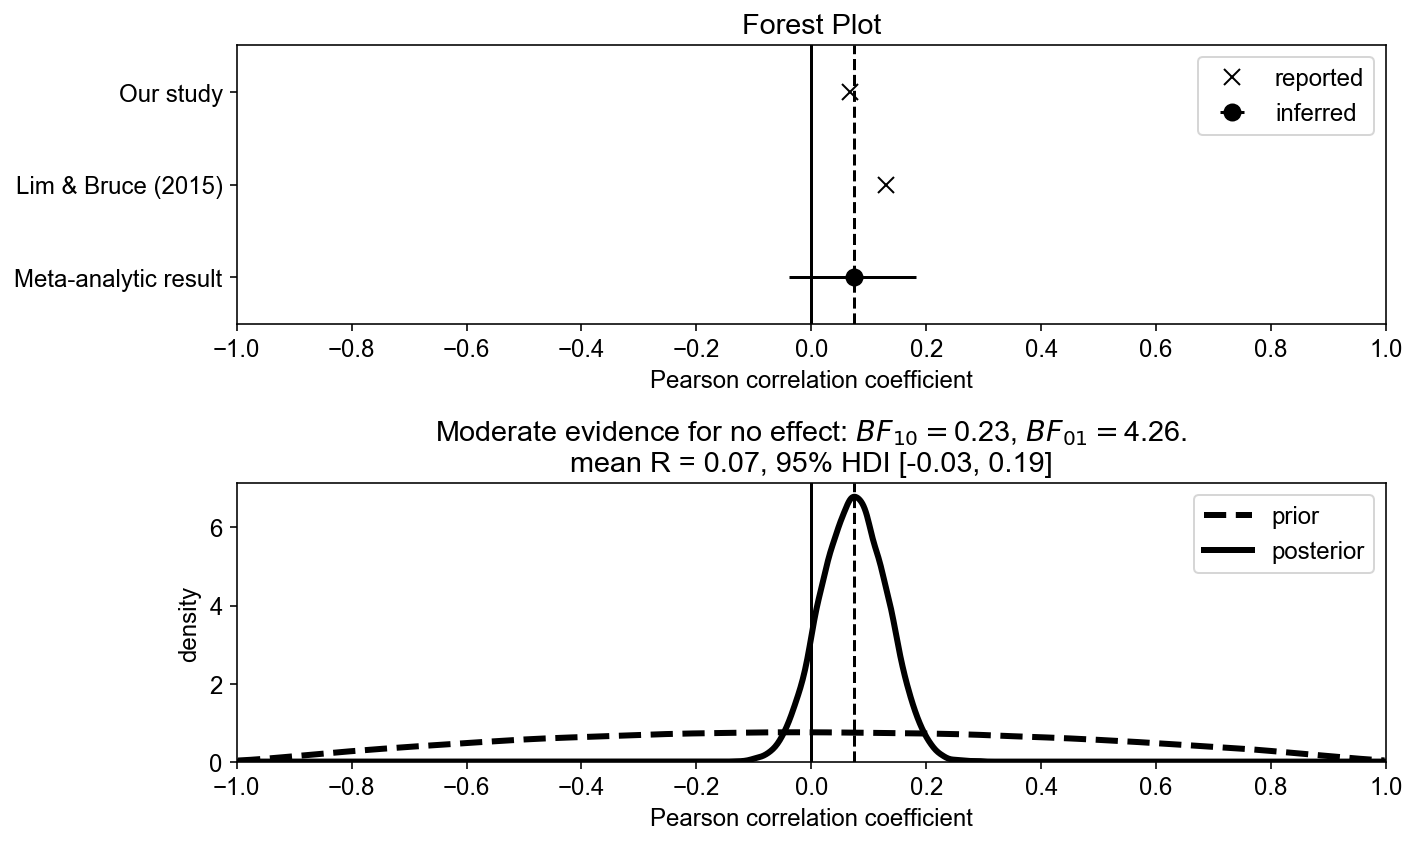

In [9]:
bm_corr.plot(results, prior, posterior, figsize=(10, 6), height_ratios=[1, 1], sort_by='effect_size')

results.to_csv('output/meta analysis results - WCQ - fixed effects.csv')

plt.savefig('figs/meta_analysis_WCQ.pdf', bbox_inches='tight')
plt.savefig('img/meta_analysis_WCQ.png', bbox_inches='tight', dpi=300)